<a href="https://colab.research.google.com/github/Sukyeong02/23-2-XAI/blob/main/Lecture_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

wine = pd.read_csv('wine_csv_data.csv')
print(type(wine))
wine

<class 'pandas.core.frame.DataFrame'>


,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
input_data = wine[['alcohol','sugar','pH']]
print(type(input_data))
input_data

<class 'pandas.core.frame.DataFrame'>


,alcohol,sugar,pH
0,9.4,1.9,3.51
1,9.8,2.6,3.20
2,9.8,2.3,3.26
3,9.8,1.9,3.16
4,9.4,1.9,3.51
...,...,...,...
6492,11.2,1.6,3.27
6493,9.6,8.0,3.15
6494,9.4,1.2,2.99
6495,12.8,1.1,3.34


In [ ]:
x = input_data.to_numpy()
print(type(x))
print(x.shape)
x

<class 'numpy.ndarray'>
(6497, 3)


array([[ 9.4 ,  1.9 ,  3.51],
       [ 9.8 ,  2.6 ,  3.2 ],
       [ 9.8 ,  2.3 ,  3.26],
       ...,
       [ 9.4 ,  1.2 ,  2.99],
       [12.8 ,  1.1 ,  3.34],
       [11.8 ,  0.8 ,  3.26]])

In [ ]:
y = wine['class'].to_numpy()
print(type(y))
print(y.shape)
y

<class 'numpy.ndarray'>
(6497,)


array([0., 0., 0., ..., 1., 1., 1.])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
print(x_train.shape)
print(x_test.shape)

(5197, 3)
(1300, 3)


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

ss.fit(x_train)

x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(x_train_scaled, y_train)

print('학습 데이터셋:', kn.score(x_train_scaled, y_train))
print('시험 데이터셋:', kn.score(x_test_scaled, y_test))

학습 데이터셋: 0.9022512988262459
시험 데이터셋: 0.8346153846153846


In [ ]:
score = 0
for n in range(2,101):
    kn.n_neighbors = n

    tmp = kn.score(x_test_scaled, y_test)

    if score < tmp:
        score = tmp
        best_k = n

print('최적의 k값:', best_k)
print('최고 정확도:', score)

최적의 k값: 23
최고 정확도: 0.85


In [ ]:
score = 0
hist = []
for n in range(2,101):
    kn.n_neighbors = n

    tmp = kn.score(x_test_scaled, y_test)
    hist.append(tmp)

    if score < tmp:
        score = tmp
        best_k = n

print('최적의 k값:', best_k)
print('최고 정확도:', score)

최적의 k값: 23
최고 정확도: 0.85


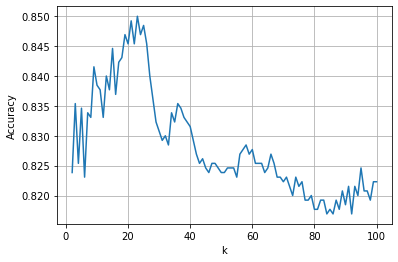

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(2,101), hist)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train_scaled, y_train)
print('학습 데이터셋:', dt.score(x_train_scaled, y_train))
print('시험 데이터셋:', dt.score(x_test_scaled, y_test))

학습 데이터셋: 0.996921300750433
시험 데이터셋: 0.8592307692307692


위의 모델의 결과를 보면 **과대적합** 되었음

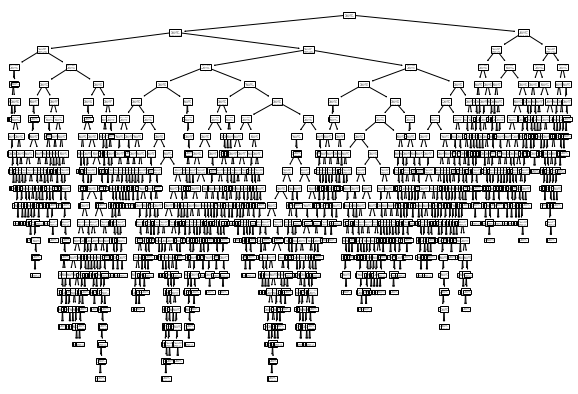

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

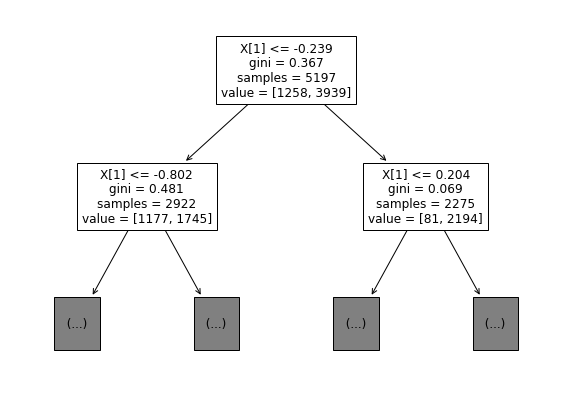

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1)
plt.show()

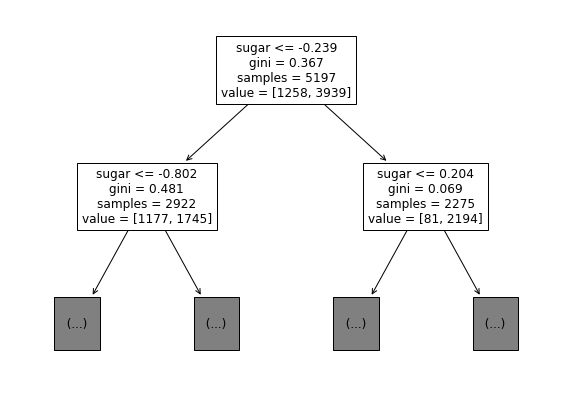

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, feature_names=['alcohol','sugar','pH'])
plt.show()

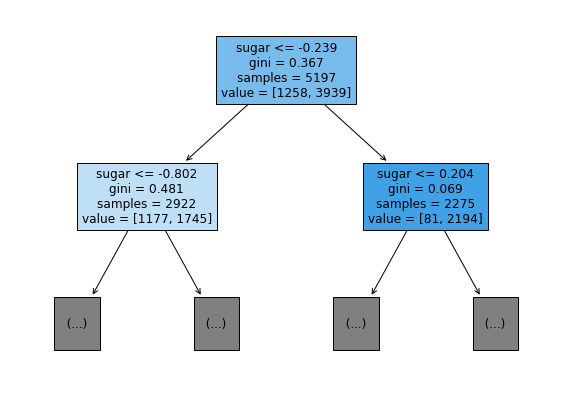

In [ ]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, feature_names=['alcohol','sugar','pH'], filled=True)
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(x_train_scaled, y_train)
print('학습 데이터셋:', dt.score(x_train_scaled, y_train))
print('시험 데이터셋:', dt.score(x_test_scaled, y_test))

학습 데이터셋: 0.8454877814123533
시험 데이터셋: 0.8415384615384616


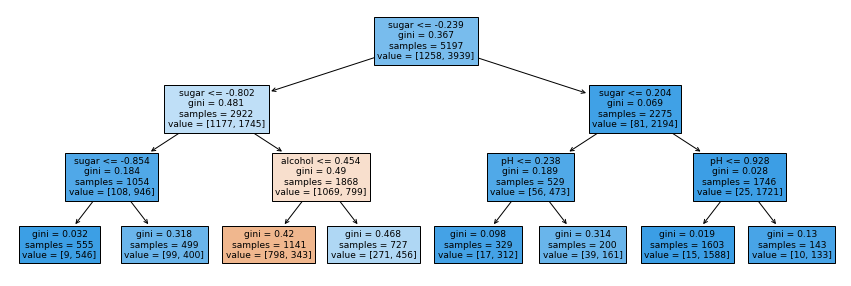

In [ ]:
plt.figure(figsize=(15,5))
plot_tree(dt, feature_names=['alcohol', 'sugar','pH'], filled=True)
plt.show()

전처리

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(x_train_scaled, y_train)
print('학습 데이터셋:', dt.score(x_train_scaled, y_train))
print('시험 데이터셋:', dt.score(x_test_scaled, y_test))

학습 데이터셋: 0.8454877814123533
시험 데이터셋: 0.8415384615384616


In [ ]:
dt.fit(x_train, y_train)
print('학습 데이터셋:', dt.score(x_train, y_train))
print('시험 데이터셋:', dt.score(x_test, y_test))

학습 데이터셋: 0.8454877814123533
시험 데이터셋: 0.8415384615384616


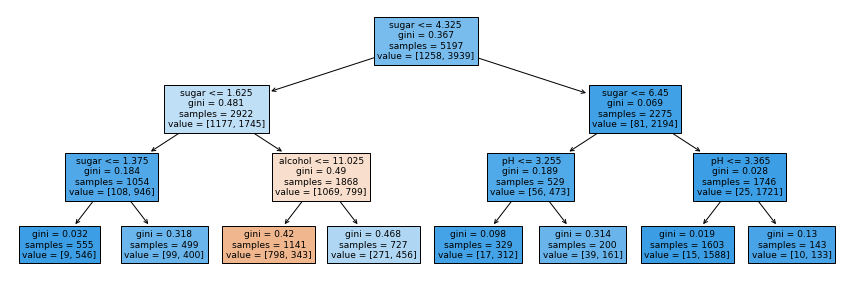

In [ ]:
plt.figure(figsize=(15,5))
plot_tree(dt, feature_names = ['alcohol', 'sugar',' pH'], filled=True)
plt.show()

In [ ]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]
